# Imports

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # for countplot(counting bar plot)

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------

# Reading the data
<p style="direction: rtl; text-align:center">فایل های داده را خوانده و با استفاده از متد head بخشی از آن ها را نمایش دهید.</p>

In [55]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,id,carat,clarity,color,cut,depth,table,x,y,z
0,1,338735101,0.23,SI2,E,Ideal,61.5,55.0,3.95,3.98,2.43
1,2,621861882,0.21,SI1,E,Premium,59.8,61.0,3.89,3.84,2.31
2,3,473363314,0.23,VS1,E,Good,56.9,65.0,4.05,4.07,2.31
3,4,450523266,0.29,VS2,I,Premium,62.4,58.0,4.20,4.23,2.63
4,5,529059166,0.31,SI2,J,Good,63.3,58.0,4.34,4.35,2.75


In [56]:
prices = pd.read_csv('diamond_prices.csv')
prices.head()

,Unnamed: 0,id,price
0,1,338735101,326.0
1,2,621861882,326.0
2,3,473363314,327.0
3,4,450523266,334.0
4,5,529059166,335.0


#### ---------------------------------------------------------------------------------------------------------------------------------------------------------

# Data preparation
<p style="direction: rtl; text-align:center">می خواهیم فیلد قیمت را به دیتافریم اطلاعات الماس ها اضافه کنیم؛ این کار را با استفاده از ستون id که در هر دو دیتافریم موجود است انجام دهید. می توانید از متد merge استفاده کنید</p>

In [57]:
# Setting the IDs as indexes for ease of use 
diamonds = diamonds.set_index('id')

In [58]:
# Merging the prices dataframe with diamonds based on the IDs
diamonds = pd.merge(diamonds, prices, on='id')

<p style="direction: rtl; text-align:center">وجود مقادیر nan در دیتا را بررسی کنید؛ در صورت وجود، راه حلی برای مشکل ارائه داده و پیاده سازی کنید. راه حل خود را شرح دهید</p>

In [59]:
diamonds.isna().sum()

id               0
Unnamed: 0_x     0
carat            0
clarity          0
color            0
cut              0
depth            0
table            0
x                0
y                0
z                0
Unnamed: 0_y     0
price           10
dtype: int64

In [60]:
# Seeing which items have a NaN price
diamonds.loc[diamonds["price"].isna() == True]

,id,Unnamed: 0_x,carat,clarity,color,cut,depth,table,x,y,z,Unnamed: 0_y,price
4436,716299269,4437,1.09,VS2,J,Ideal,62.5,55.0,6.64,6.58,4.13,4437,NaN
8104,964796986,8105,1.15,SI1,J,Premium,62.3,55.0,6.76,6.66,4.18,8105,NaN
8257,944512814,8258,1.01,VS2,I,Ideal,64.1,58.0,6.27,6.21,4.00,8258,NaN
17189,463352209,17190,1.03,VS1,G,Ideal,62.3,56.0,6.50,6.46,4.04,17190,NaN
20429,760821565,20430,1.58,SI1,I,Very Good,63.1,55.0,7.42,7.45,4.69,20430,NaN
20459,210431297,20460,1.71,SI2,I,Fair,65.1,60.0,7.50,7.46,4.87,20460,NaN
22570,374457343,22571,1.75,VS1,J,Premium,62.2,59.0,7.74,7.70,4.80,22571,NaN
23353,121346674,23354,0.30,SI1,I,Ideal,62.5,58.0,4.25,4.29,2.67,23354,NaN
33197,504026313,33198,0.30,VVS2,G,Ideal,62.2,54.0,4.33,4.29,2.68,33198,NaN
40224,722019479,40225,0.40,VS1,D,Premium,60.9,58.0,4.78,4.81,2.92,40225,NaN


In [61]:
# We can use fill in the blanks with the median of the price to have the least impact (we can also use Cosin similarity to find the most similar ones, but it was too complicated for me)
diamonds['price'] = diamonds['price'].fillna(diamonds['price'].median())

<p style="direction: rtl; text-align:center">می خواهیم تاثیر خصیصه های مختلف بر قیمت الماس را بررسی کنیم؛ آیا ستونی در داده وجود دارد که در این فرآیند تحلیلی ارزشمند نباشد؟ آن(ها) را حذف کنید.</p>

In [62]:
# Dropping the 'Unnamed: 0_x' and 'Unnamed: 0_y' for a cleaner dataframe, as they are not needed
diamonds = diamonds.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

<p style="direction: rtl; text-align:center">برای هر یک از ستون های عددی، با استفاده از متد describe، مقادیر آن ها را بررسی کرده و از معتبر بودن مقادیر مطمئن شوید. سعی کنید شاخص های آماری مربوط به هر ستون را بر اساس ماهیت آن ستون تحلیل کنید. در صورت شناسایی مقادیر نامتعبر در هر ستون، رکورد های مربوطه را از داده حذف کنید</p>

## Carat

In [63]:
diamonds['carat'].describe(percentiles=[.25, .50, .75, .80, .85, .90, .95, .99])

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
80%          1.130000
85%          1.240000
90%          1.510000
95%          1.700000
99%          2.180000
max          5.010000
Name: carat, dtype: float64

There are rare items that have a carat of 2 and above. they are quite rare, but not impossible.  

The Carat's data have a exponential distribution, their existence is not unusual(because they are so few).  

They can also be dropped to further normalize the data.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------

## Depth & Table

In [64]:
diamonds['depth'].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

The optimum depth percentage of a diamond is between 57.5 to 63% (according to the International Gem Society). However, any value outside of this range isn't necessarily invalid.

In [65]:
diamonds.loc[(diamonds['depth'] > 70) & ((diamonds['table'] > 66) | diamonds['table'] < 53)]

,id,carat,clarity,color,cut,depth,table,x,y,z,price
4307,553344851,0.99,VS2,H,Fair,71.6,57.0,5.94,5.80,4.20,3593.0
8014,227150364,1.50,SI2,I,Fair,70.1,58.0,6.96,6.85,4.84,4328.0
8186,853421181,1.50,I1,I,Fair,71.3,58.0,6.85,6.81,4.87,4368.0
8356,812672416,1.02,SI1,D,Fair,70.6,57.0,6.08,6.01,4.27,4398.0
8672,214442614,1.02,VS1,H,Fair,71.8,56.0,6.04,5.97,4.31,4455.0
15781,205201632,2.01,I1,G,Fair,70.2,57.0,7.53,7.50,5.27,6315.0
16439,666234166,2.22,I1,H,Fair,70.1,55.0,7.77,7.74,5.44,6564.0
17181,627314599,2.32,I1,H,Fair,70.5,55.0,7.93,7.90,5.58,6860.0
17717,182229604,0.50,I1,F,Fair,71.0,57.0,4.87,4.79,3.43,613.0
26099,627839854,2.00,SI2,F,Fair,70.2,57.0,7.63,7.59,5.34,15351.0


According to another source, any cut percentage over 70% should be considered a cut quality of 'poor', so any depth value over 70% cannot be 'fair'.  

Furthermore, any table percentage over 66% and under 53% is also considered 'poor', so those should also be 'poor' (Table and Depth are correlated).  

As these items are outside of the dataframe's range, they can be dropped.

In [66]:
diamonds = diamonds.drop(diamonds[(diamonds['depth'] > 70) & ((diamonds['table'] > 66) | diamonds['table'] < 53)].index)

### Normalizing

In [67]:
# Depth < 55

diamonds = diamonds.drop(diamonds[(diamonds['depth'] < 55)].index)

In [68]:
# 50 > Table > 70

diamonds = diamonds.drop(diamonds[(diamonds['table'] > 70) | (diamonds['table'] < 50)].index)

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------

## X, Y and Z

In [69]:
diamonds[['x', 'y', 'z']].describe()

,x,y,z
count,53885.000000,53885.000000,53885.000000
mean,5.730892,5.734369,3.538504
std,1.121848,1.142279,0.705546
min,0.000000,0.000000,0.000000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.520000
75%,6.540000,6.540000,4.030000
max,10.740000,58.900000,31.800000


An optimal X and Y should have the ratio around 1.2 to 1.6 (less is also acceptable), therefore any ratio higher than 1.6 is invalid


In [70]:
diamonds.loc[((diamonds['y'] / diamonds['x']) >= 1.7)]

,id,carat,clarity,color,cut,depth,table,x,y,z,price
11182,943190606,1.07,SI2,F,Ideal,61.6,56.0,0.00,6.62,0.00,4954.0
24067,861005710,2.00,SI2,H,Premium,58.9,57.0,8.09,58.90,8.06,12210.0
49189,626601779,0.51,VS1,E,Ideal,61.8,55.0,5.15,31.80,5.12,2075.0


These Items have to be dropped from the list(They also contain the highest Ys, which are now proven to be invalid).

In [71]:
diamonds = diamonds.drop(diamonds[((diamonds['y'] / diamonds['x']) >= 1.7)].index)

### Normalizing

Dropping z values higher than 6 to further normalize the data, as taller diamonds are rare and usually custom made.  

This also includes z values less than 2

In [72]:
# Z > 6

diamonds = diamonds.drop(diamonds[diamonds['z'] > 6].index)

In [73]:
# Z < 2

diamonds = diamonds.drop(diamonds[(diamonds['z'] < 2)].index)

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------

# Distributions
<p style="direction: rtl; text-align:center">برای ستون های عددی، نمودار توزیع را به صورت هیستوگرام رسم کنید. برای ستون های غیرعددی، یک bar plot که نشان دهنده تکرار هر کدام از مقادیر منحصر به فرد باشد رسم کنید.</p>

### Carat

<Axes: >

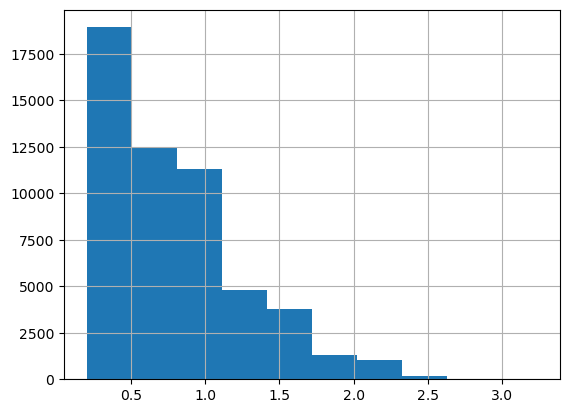

In [74]:
diamonds['carat'].hist()

### Clarity

<Axes: xlabel='clarity', ylabel='count'>

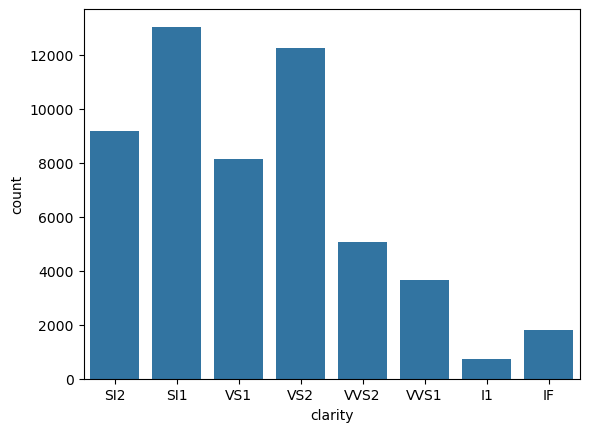

In [75]:
sns.countplot(x=diamonds['clarity'], color='#1f77b4') # not the same hue of blue, but close enough

### Color


<Axes: xlabel='color', ylabel='count'>

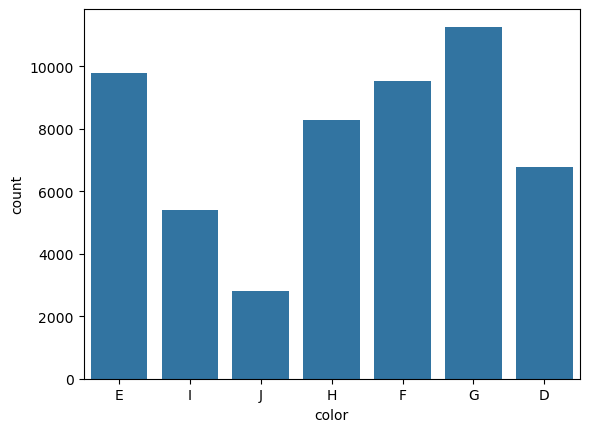

In [76]:
sns.countplot(x=diamonds['color'], color='#1f77b4')

### Cut

<Axes: xlabel='cut', ylabel='count'>

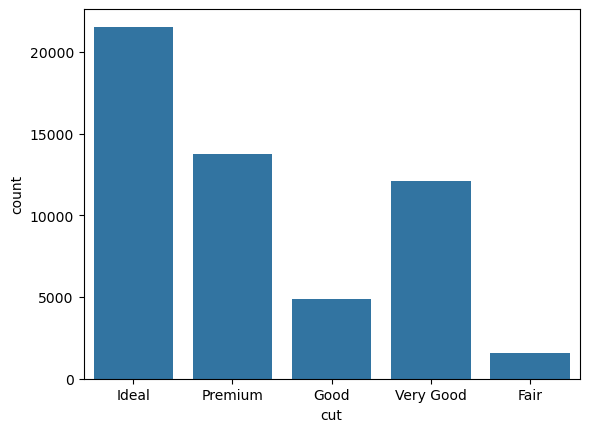

In [77]:
sns.countplot(x=diamonds['cut'], color='#1f77b4')

### Depth

<Axes: >

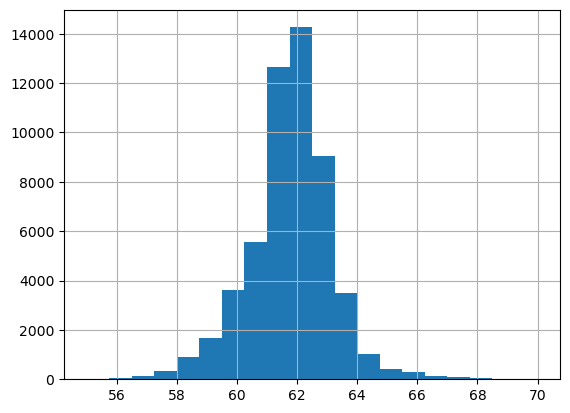

In [78]:
diamonds['depth'].hist(bins=20)

### Table

<Axes: >

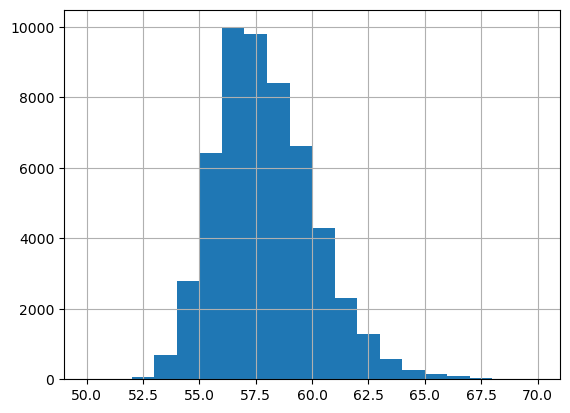

In [79]:
diamonds['table'].hist(bins=20)

### X

<Axes: >

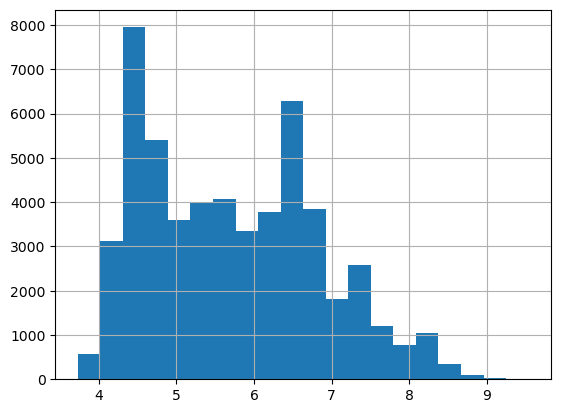

In [80]:
diamonds['x'].hist(bins=20)

### Y

<Axes: >

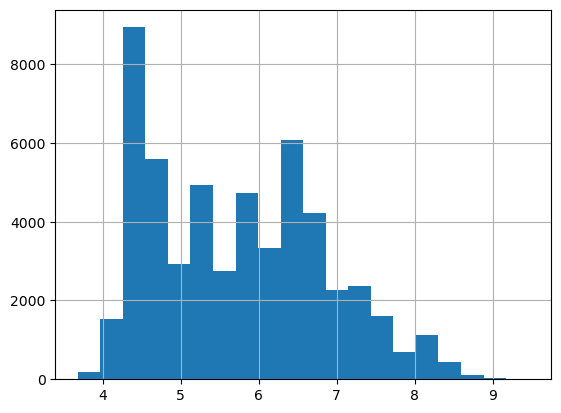

In [81]:
diamonds['y'].hist(bins=20)

### Z

<Axes: >

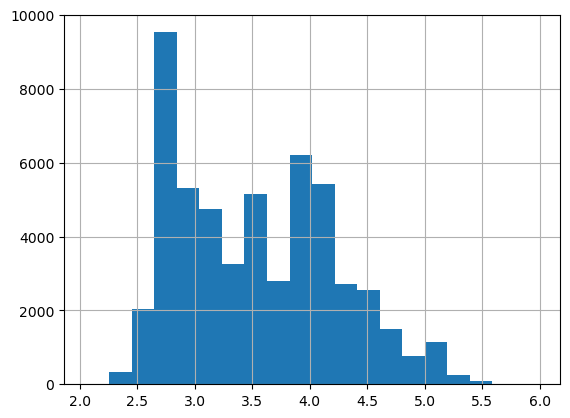

In [82]:
diamonds['z'].hist(bins=20)

### Price

<Axes: >

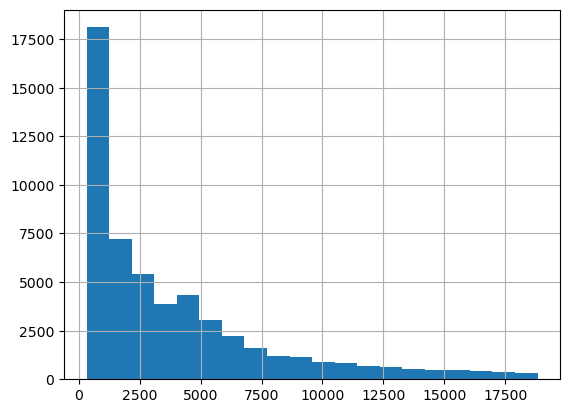

In [83]:
diamonds['price'].hist(bins=20)

# Visualization
## Scatter plots
<p style="direction: rtl; text-align:center">می خواهیم رابطه قیمت با ستون های عددی موجود در داده را با استفاده از scatter plot نمایش دهیم.</p>
<p style="direction: rtl; text-align:center"><b>تحلیل خود را از هر نمودار در سلول زیر آن بنویسید.</b></p>

#### x vs. price

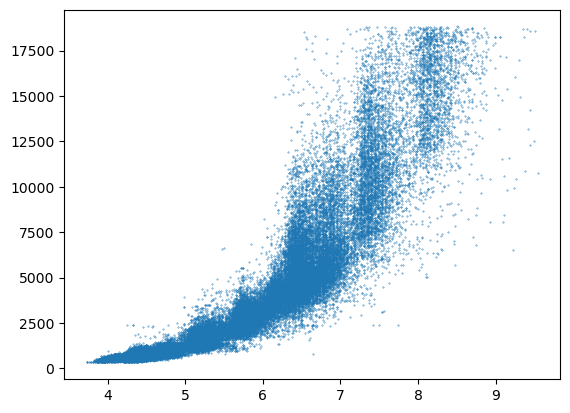

In [84]:
plt.scatter(diamonds['x'], diamonds['price'], s=0.1)

This shows the price distribution in different X ranges. the diamonds with smaller X are mostly cheaper, whilst the larger Xs have a exponential growth(higher X gets more and more expensive).  
  
There also is some clustering between 7-8 and 8-9. this shows that there are some preferred Xs over the others. meaning most people prefer a certain X, for example 7.2, with different prices. This can also be because of the characteristics of diamond. in some Xs diamonds are not as shiny as other ones

This clustering might be due to standards in size(X wise in this case), so the other Xs, like 7.3 - 7.9 are less made.

#### y vs. price

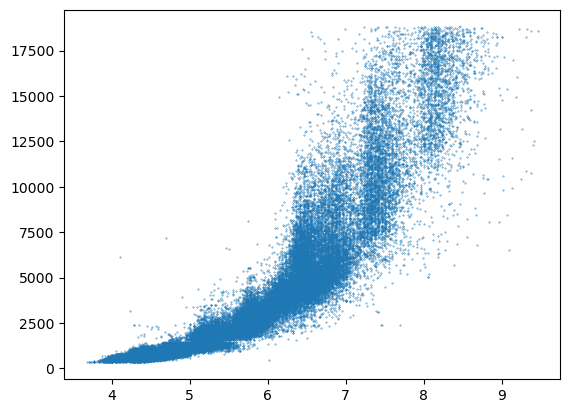

In [85]:
plt.scatter(diamonds['y'], diamonds['price'], s=0.1)

This is also the same case as X. but here we can conclude that diamonds with perfectly symmetrical shapes are more preferred(square, rectangle, hexagon, etc).  

This also has an exponential growth similar to X, which also concludes that these two parameters are very closely correlated, as they have almost exactly similar.  

The clusters in some ranges are also the same case as X, where people prefer the standards.

#### z vs. price

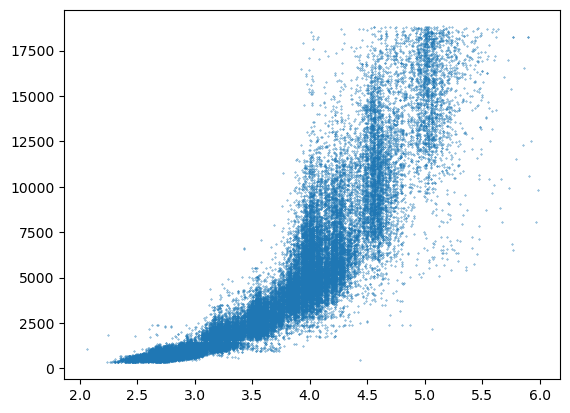

In [86]:
plt.scatter(diamonds['z'], diamonds['price'], s=0.1)

Still the same case as X and Y. This means that these three parameters are linked.  

Here we can also see some faint white stripes. these show that people mostly avoid some Ys, this can be due to interference with X and Y and may make the diamond look rather odd.

These stripes are also barely visible at X and Y, but as they are less apparent, they can mean that there is more freedom for choosing the X and Y compared to Z

#### carat vs. price

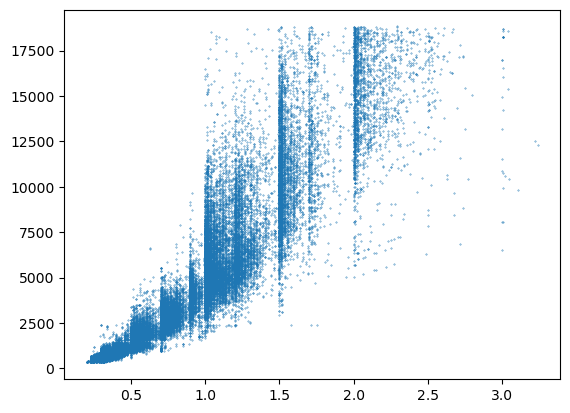

In [87]:
plt.scatter(diamonds['carat'], diamonds['price'], s=0.1)

Carat also follows an exponential growth.  

These clusters near 0.5, 0.75, 1.0, 1.5, 1.5, 1.75 and 2.0 shows the standards in carat. This means that these values are the most common carat of diamond(increments of 0.25) with a wide range of prices.  

As these can stretch to high prices, we can say that they come with a wide range of sizes(X,Y,Z) and people generally prefer this values of carats than other(probably due to the round prices).

#### table vs. price

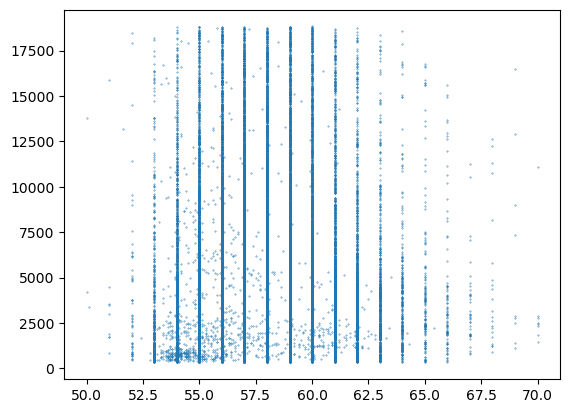

In [88]:
plt.scatter(diamonds['table'], diamonds['price'], s=0.1)

This shows a very distinct difference between different table sizes. we can see exactly what table sizes are the most common.  

Table sizes also don't affect prise that much, but have some role in very low and very high sizes.  

There are also some table values in between the lines, which makes them quite rare. It very well can be a industry standard to make diamonds with these common table sizes, and those rare one can be either custom made or some unique designs(mostly cheap). 

#### depth vs. price

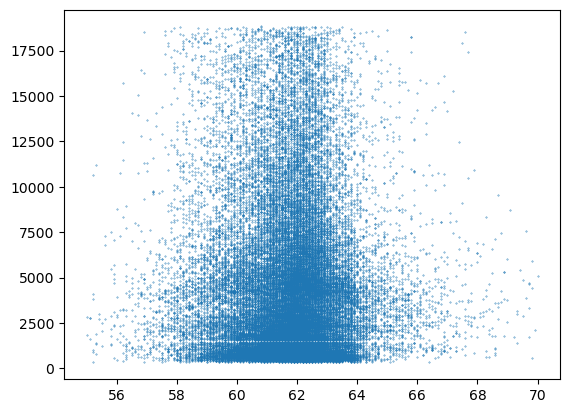

In [89]:
plt.scatter(diamonds['depth'], diamonds['price'], s=0.1)

The density shows that a very high number of diamonds have the depth of 60 - 64, with 62 being the hights. This also may be a industry standard.  

As the density is highest in cheaper ranges, it may mean that most cheaper diamonds are made with this depth(as they are also the highest in demand).  

This trend is also followed by more expensive diamonds, further proving the standard.

<p style="direction: rtl; text-align:center">حال می خواهیم به بررسی ارتباط برخی ویژگی ها با یکدیگر بپردازیم. برای موارد ذکر شده در ادامه نیز نمودار scatter رسم کنید</p>

#### x vs. y

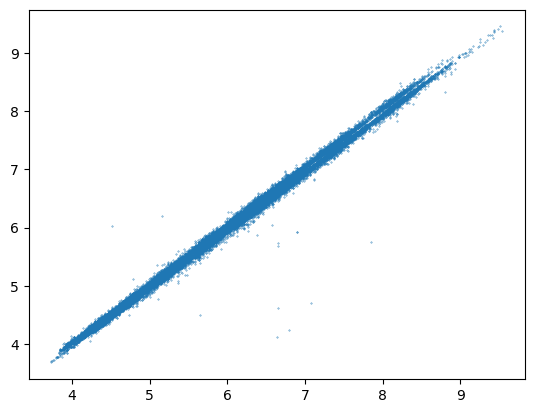

In [90]:
plt.scatter(diamonds['x'], diamonds['y'], s=0.1)

This clearly shows the tight correlation between X and Y.  
This also means that nearly all the diamonds have the same X diameter as Y, and vise versa, meaning they are all very symmetrical and square-ish in diameters and they very rarely stretch. 


#### x vs. z

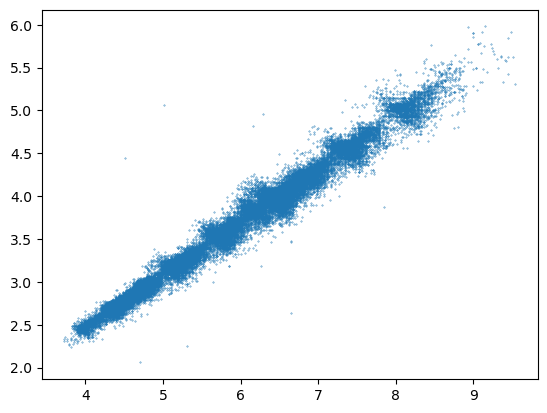

In [91]:
plt.scatter(diamonds['x'], diamonds['z'], s=0.1)

This plot shows that there is less relation between X and z, as there is between X and Y. This means that there is more freedom for Z and it can have more variety.  
This also can mean that there are more diamonds that are a bit taller than others, and their side has more of a rectangular shape.


#### y vs. z

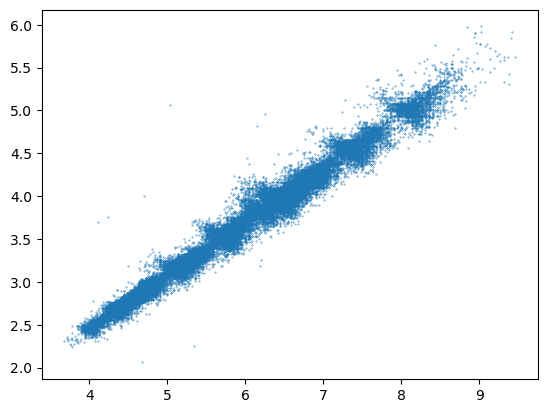

In [92]:
plt.scatter(diamonds['y'], diamonds['z'], s=0.1)

This plot also is the same case as X-Z, and the reason these two plot are so similar is that the diamonds have an almost cube like dimensions, thus the X-Z and Y-Z sides are similar.  
There are also very few exceptions, but are mostly unique diamond shapes(like oval) and are very few in numbers.

#### table vs. table

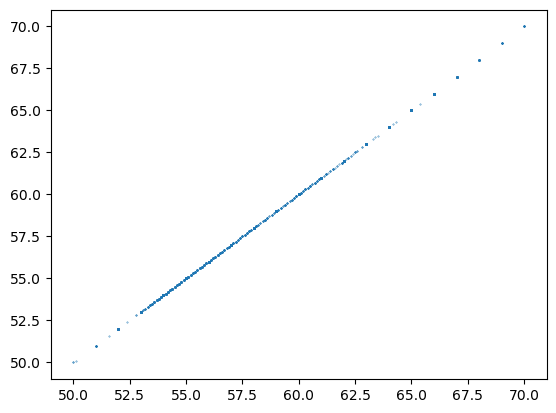

In [93]:
plt.scatter(diamonds['table'], diamonds['table'], s=0.1)

This shows the density of table sizes. The most density is between ~53 to ~63. after those, sizes are very specific and do nat vary as much(the dots on the top right). This means that there are very high jumps between table sizes and there isn't much variety between those numbers.

## Feature engineering
<p style="direction: rtl; text-align:right">می دانیم که ستون price، قیمت کل هر قطعه الماس را مشخص می کند. برای بررسی تاثیر خصیصه هایی که به ابعاد و وزن الماس مربوط نیستند، نیاز است که قیمتی مستقل از ابعاد الماس را مصاحبه کرده و با آن به مصور سازی بپردازیم. از آنجا که ستون carat یا همان قیراط، جرم هر قطعه را نشان می دهد، می توان با تقسیم کردن قیمت هر قطعه به جرم آن، یک قیمت مستقل از ابعاد برای هر قطعه محاسبه کرد. همچنین با استفاده از ستون های x y z نیز می توان یک حجم تقریبی از الماس محاسبه کرد.</p>

<ul style="text-align:right">
    <li style="direction: rtl">به ازای هر رکورد در داده، مقدار price را تقسیم بر مقدار carat کرده و حاصل را در ستون جدیدی به نام unit_price قرار دهید.</li>
    <li style="direction: rtl">به ازای هر رکورد داده، مقادیر x y z را در هم ضرب کرده و مقدار حاصل را در ستون جدیدی به نام v قرار دهید.</li>
    </ul>

In [94]:
diamonds['unit_price'] = diamonds['price'] / diamonds['carat']
diamonds

,id,carat,clarity,color,cut,depth,table,x,y,z,price,unit_price
0,338735101,0.23,SI2,E,Ideal,61.5,55.0,3.95,3.98,2.43,326.0,1417.391304
1,621861882,0.21,SI1,E,Premium,59.8,61.0,3.89,3.84,2.31,326.0,1552.380952
2,473363314,0.23,VS1,E,Good,56.9,65.0,4.05,4.07,2.31,327.0,1421.739130
3,450523266,0.29,VS2,I,Premium,62.4,58.0,4.20,4.23,2.63,334.0,1151.724138
4,529059166,0.31,SI2,J,Good,63.3,58.0,4.34,4.35,2.75,335.0,1080.645161
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,326678422,0.72,SI1,D,Ideal,60.8,57.0,5.75,5.76,3.50,2757.0,3829.166667
53936,708103397,0.72,SI1,D,Good,63.1,55.0,5.69,5.75,3.61,2757.0,3829.166667
53937,133131527,0.70,SI1,D,Very Good,62.8,60.0,5.66,5.68,3.56,2757.0,3938.571429
53938,378841830,0.86,SI2,H,Premium,61.0,58.0,6.15,6.12,3.74,2757.0,3205.813953


In [95]:
diamonds['v'] = diamonds['x'] * diamonds['y'] * diamonds['z']
diamonds

,id,carat,clarity,color,cut,depth,table,x,y,z,price,unit_price,v
0,338735101,0.23,SI2,E,Ideal,61.5,55.0,3.95,3.98,2.43,326.0,1417.391304,38.202030
1,621861882,0.21,SI1,E,Premium,59.8,61.0,3.89,3.84,2.31,326.0,1552.380952,34.505856
2,473363314,0.23,VS1,E,Good,56.9,65.0,4.05,4.07,2.31,327.0,1421.739130,38.076885
3,450523266,0.29,VS2,I,Premium,62.4,58.0,4.20,4.23,2.63,334.0,1151.724138,46.724580
4,529059166,0.31,SI2,J,Good,63.3,58.0,4.34,4.35,2.75,335.0,1080.645161,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,326678422,0.72,SI1,D,Ideal,60.8,57.0,5.75,5.76,3.50,2757.0,3829.166667,115.920000
53936,708103397,0.72,SI1,D,Good,63.1,55.0,5.69,5.75,3.61,2757.0,3829.166667,118.110175
53937,133131527,0.70,SI1,D,Very Good,62.8,60.0,5.66,5.68,3.56,2757.0,3938.571429,114.449728
53938,378841830,0.86,SI2,H,Premium,61.0,58.0,6.15,6.12,3.74,2757.0,3205.813953,140.766120


<p style="direction: rtl; text-align:center">ارتباط ستون های جدید با قیمت و دیگر ستون ها چیست؟ به ازای موارد خواسته شده در ادامه، نمودار scatter plot رسم کنید و تحلیل خود را از آن ها ذکر کنید</p>

#### unit_price vs. price

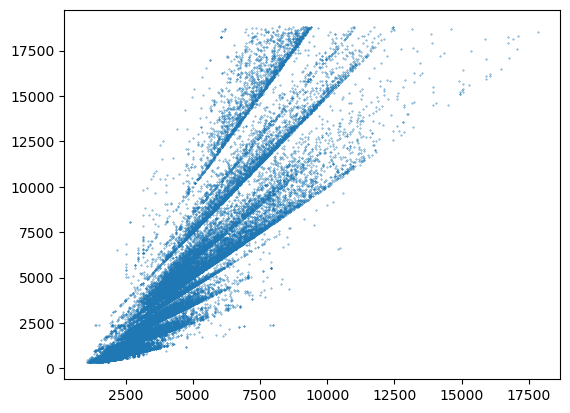

In [96]:
plt.scatter(diamonds['unit_price'], diamonds['price'], s=0.1)

There are multiple linear growths in this plot.  

Each resemble a certain threshold of different carats. As the value of price per carat increases, the overall price also increases.  

These line are different carats and their growth of overall price.

#### v vs. carat

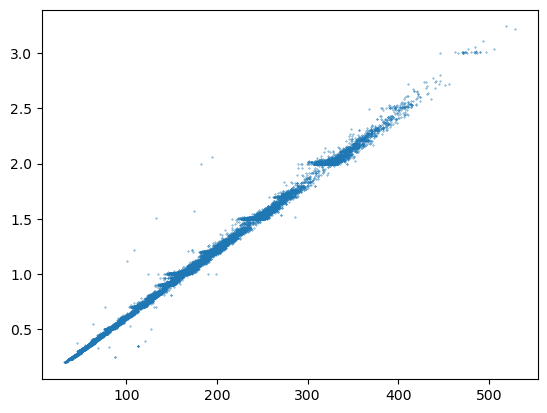

In [97]:
plt.scatter(diamonds['v'], diamonds['carat'], s=0.1)

This plot shows the more common volumes based on the carat. higher carats have also higher volumes as the lower one also have less.  
The clusters over a line(like 1.5-2.0 and 2.0-2.5 carats) are because of the high number of diamonds with a round(or well-known) carat, which shows that the are less diamonds with carats like 2.84.

#### x vs. carat

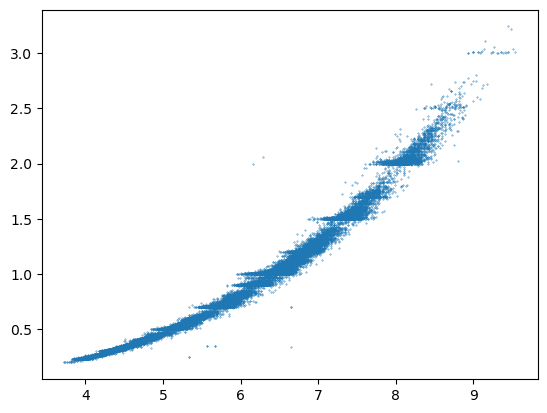

In [98]:
plt.scatter(diamonds['x'], diamonds['carat'], s=0.1)

The exponential growth means that as the X increases, the carat first increases slowly and gains speed. meaning the range of 4 - 6 has a lower carat increase that the 7 - 9, which has a very high increase. So, higher carats almost always have a bigger X(are much bigger) than smaller ones.

### Clarity
<p style="direction: rtl; text-align:center">ابتدا مقادیر موجود در ستون clarity را به گونه ای به مقادیر عددی تبدیل کنید که: اعداد کوچکتر متناظر با شفافیت کمتر و اعداد بزرگتر متناظر با شفافیت بیشتر باشند</p>

In [99]:
clarities = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cl_values = [  1,    2,     3,     4,     5,     6,      7,      8]

diamonds['clarity'].replace(clarities, cl_values, inplace=True)

diamonds

,id,carat,clarity,color,cut,depth,table,x,y,z,price,unit_price,v
0,338735101,0.23,2,E,Ideal,61.5,55.0,3.95,3.98,2.43,326.0,1417.391304,38.202030
1,621861882,0.21,3,E,Premium,59.8,61.0,3.89,3.84,2.31,326.0,1552.380952,34.505856
2,473363314,0.23,5,E,Good,56.9,65.0,4.05,4.07,2.31,327.0,1421.739130,38.076885
3,450523266,0.29,4,I,Premium,62.4,58.0,4.20,4.23,2.63,334.0,1151.724138,46.724580
4,529059166,0.31,2,J,Good,63.3,58.0,4.34,4.35,2.75,335.0,1080.645161,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,326678422,0.72,3,D,Ideal,60.8,57.0,5.75,5.76,3.50,2757.0,3829.166667,115.920000
53936,708103397,0.72,3,D,Good,63.1,55.0,5.69,5.75,3.61,2757.0,3829.166667,118.110175
53937,133131527,0.70,3,D,Very Good,62.8,60.0,5.66,5.68,3.56,2757.0,3938.571429,114.449728
53938,378841830,0.86,2,H,Premium,61.0,58.0,6.15,6.12,3.74,2757.0,3205.813953,140.766120


<p style="direction: rtl; text-align:center">حال نموداری خطی رسم کنید که: محور افقی نشان دهنده میزان شفافیت از کم به زیاد، و محور عمودی نشان دهنده میانگین قیمت باشد</p>
<p style="direction: rtl; text-align:center">راهنمایی: ابتدا داده را بر اساس مقادیر عددی clarity گروهبندی کنید (groupby) سپس از قیمت ها میانگین بگیرید</p>
<p style="direction: rtl; text-align:center"><b>برداشت خود را از نمودار بنویسید</b></p>
<p style="direction: rtl; text-align:center"><b>همین کار را برای ستون های cut و color نیز تکرار کنید</b></p>

### Clarity

<Axes: xlabel='clarity'>

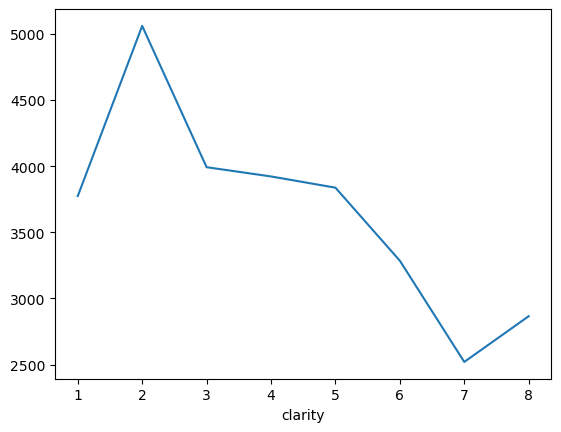

In [100]:
diamonds.groupby('clarity')['price'].mean().plot()

My take is that the diamonds with higher clarity are significantly rarer than lower ones, making them much harder to find in higher quantities.  this in turn may make the more common ones ideal for expensive works and complicated designs. Rarity may not always mean expensive.  

The lower clarity diamonds are also found in larger sizes, having a higher carat. this increases their value and flexibility.

As why the 2 clarity is more expensive than 1, it may be because 1 is too low for jewelers to work on and use more expensive equipment for higher quality cuts.

### Color

In [101]:
colors =    ['J', 'I', 'H', 'G', 'F', 'E', 'D']
co_values = [ 1,   2,   3,   4,   5,   6,   7]

diamonds['color'].replace(colors, co_values, inplace=True)

diamonds

,id,carat,clarity,color,cut,depth,table,x,y,z,price,unit_price,v
0,338735101,0.23,2,6,Ideal,61.5,55.0,3.95,3.98,2.43,326.0,1417.391304,38.202030
1,621861882,0.21,3,6,Premium,59.8,61.0,3.89,3.84,2.31,326.0,1552.380952,34.505856
2,473363314,0.23,5,6,Good,56.9,65.0,4.05,4.07,2.31,327.0,1421.739130,38.076885
3,450523266,0.29,4,2,Premium,62.4,58.0,4.20,4.23,2.63,334.0,1151.724138,46.724580
4,529059166,0.31,2,1,Good,63.3,58.0,4.34,4.35,2.75,335.0,1080.645161,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,326678422,0.72,3,7,Ideal,60.8,57.0,5.75,5.76,3.50,2757.0,3829.166667,115.920000
53936,708103397,0.72,3,7,Good,63.1,55.0,5.69,5.75,3.61,2757.0,3829.166667,118.110175
53937,133131527,0.70,3,7,Very Good,62.8,60.0,5.66,5.68,3.56,2757.0,3938.571429,114.449728
53938,378841830,0.86,2,3,Premium,61.0,58.0,6.15,6.12,3.74,2757.0,3205.813953,140.766120


<Axes: xlabel='color'>

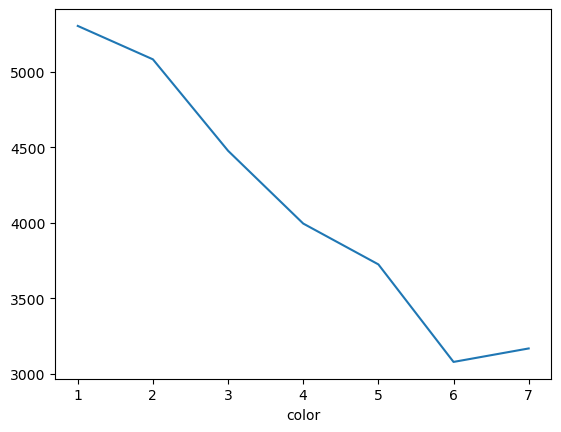

In [102]:
diamonds.groupby('color')['price'].mean().plot()

This may very well be the same case as clarity.  

Diamonds with lower color quality have a faint yellow hue in bright light. This may make them a better option for more expensive jewellers, as they are also found in higher carats.  

Their yellow-ish color may also make them a better looking piece on gold and silver rings.

### Cut

In [103]:
cuts =     ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
cu_values = [1,      2,      3,           4,         5]

diamonds['cut'].replace(cuts, cu_values, inplace=True)

diamonds

,id,carat,clarity,color,cut,depth,table,x,y,z,price,unit_price,v
0,338735101,0.23,2,6,5,61.5,55.0,3.95,3.98,2.43,326.0,1417.391304,38.202030
1,621861882,0.21,3,6,4,59.8,61.0,3.89,3.84,2.31,326.0,1552.380952,34.505856
2,473363314,0.23,5,6,2,56.9,65.0,4.05,4.07,2.31,327.0,1421.739130,38.076885
3,450523266,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63,334.0,1151.724138,46.724580
4,529059166,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75,335.0,1080.645161,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,326678422,0.72,3,7,5,60.8,57.0,5.75,5.76,3.50,2757.0,3829.166667,115.920000
53936,708103397,0.72,3,7,2,63.1,55.0,5.69,5.75,3.61,2757.0,3829.166667,118.110175
53937,133131527,0.70,3,7,3,62.8,60.0,5.66,5.68,3.56,2757.0,3938.571429,114.449728
53938,378841830,0.86,2,3,4,61.0,58.0,6.15,6.12,3.74,2757.0,3205.813953,140.766120


<Axes: xlabel='cut'>

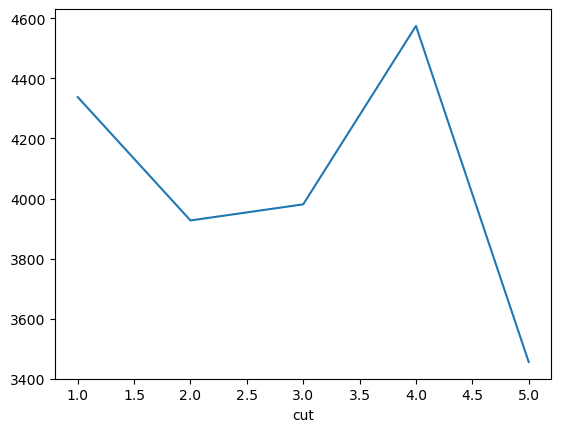

In [104]:
diamonds.groupby('cut')['price'].mean().plot()

Diamonds with higher volumes may not need high quality cuts. That may be why the cut quality of 1 is more expensive than 2 and 3. 2 and 3 may also be not so popular for expensive works.  

cut quality of 4 has the highest average. This my be due to the size of the diamonds. it may be the sweet spot for expensive and bif diamonds, as it may not need the more expensive equipment. This may also be why cut quality 5 has such a low average. it may just be too expensive to do, and is usually preferred for much smaller, but finer quality diamonds, which doesn't necessarily make them expensive(as they are very small)

### clarity, cut, color, in a single picture
<p style="direction: rtl; text-align:center">می خواهیم تاثیر هر سه ستون cut, color, clarity را بصورت همزمان و در یک نمودار بررسی کنیم. برای اینکار ستون جدیدی به نام avg_quality محاسبه می کنیم. به ازای هر رکورد در داده، از مقادیر عددی ستون های ذکر شده میانگین گرفته و حاصل را در ستون جدیدی به نام avg_quality قرار دهید. سپس نمودار مرحله قبل را برای ستون جدید رسم کنید</p>
<p style="direction: rtl; text-align:center"><b>برداشت خود از نمودار را بنویسید</b></p>

In [105]:
diamonds['avg_quality'] = (diamonds['clarity'] + diamonds['color'] + diamonds['cut']) // 3 # It bein a round number makes more sense (can also be easily converted to a word)
diamonds

,id,carat,clarity,color,cut,depth,table,x,y,z,price,unit_price,v,avg_quality
0,338735101,0.23,2,6,5,61.5,55.0,3.95,3.98,2.43,326.0,1417.391304,38.202030,4
1,621861882,0.21,3,6,4,59.8,61.0,3.89,3.84,2.31,326.0,1552.380952,34.505856,4
2,473363314,0.23,5,6,2,56.9,65.0,4.05,4.07,2.31,327.0,1421.739130,38.076885,4
3,450523266,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63,334.0,1151.724138,46.724580,3
4,529059166,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75,335.0,1080.645161,51.917250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,326678422,0.72,3,7,5,60.8,57.0,5.75,5.76,3.50,2757.0,3829.166667,115.920000,5
53936,708103397,0.72,3,7,2,63.1,55.0,5.69,5.75,3.61,2757.0,3829.166667,118.110175,4
53937,133131527,0.70,3,7,3,62.8,60.0,5.66,5.68,3.56,2757.0,3938.571429,114.449728,4
53938,378841830,0.86,2,3,4,61.0,58.0,6.15,6.12,3.74,2757.0,3205.813953,140.766120,3


<Axes: xlabel='avg_quality'>

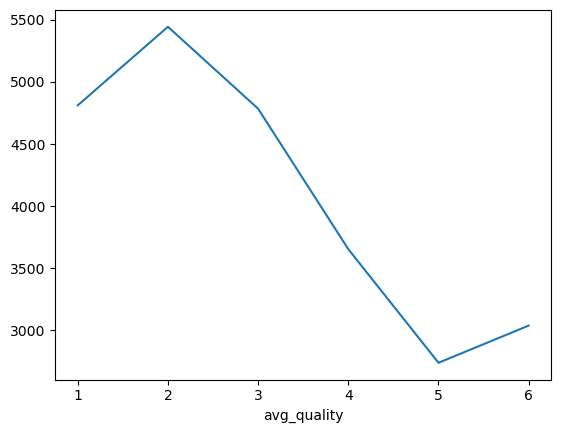

In [106]:
diamonds.groupby('avg_quality')['price'].mean().plot()

A higher average quality may not always be expensive, as the diamonds that are worked on may be much smaller.  Bigger diamonds are less expensively made to return the most profit, this may be why that average quality of 2 has the most expensive items. Those diamonds are much bigger than other, and also are not worked on with expensive machinery. They may have a lower quality, but are also very much bigger, thus having higher carat and value